# <u><center><font color=red>GRIP - The Sparks Foundation</font></center></u>

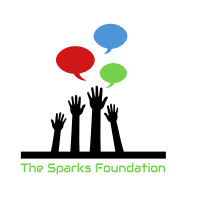

### <center>Internship on</center>
## <u><center><font color=darkblue>Data Science and Business Analytics</font></center></u>

### <center><font color='darkblue'>Author </font> :  Lakshmi Gowri Mattaparthi</center>
 <br>




## <font color=darkblue><u>Task #2 </u>: Prediction Using Unsupervised ML</font>

## <i>From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually</i>

### Model : K-means Algorithm

### <u>Data Preprocessing</u>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing datasets
data = pd.read_csv("C:\\Users\\LAKSHMI\\Downloads\\Iris.csv")
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
data.shape

(150, 6)

In [4]:
data.isnull().values.any()

False

> **As we can see there are no null values present. We can see the dataset as it is. Let's plot a pairplot to visualise all the attributes dependency on each other.**

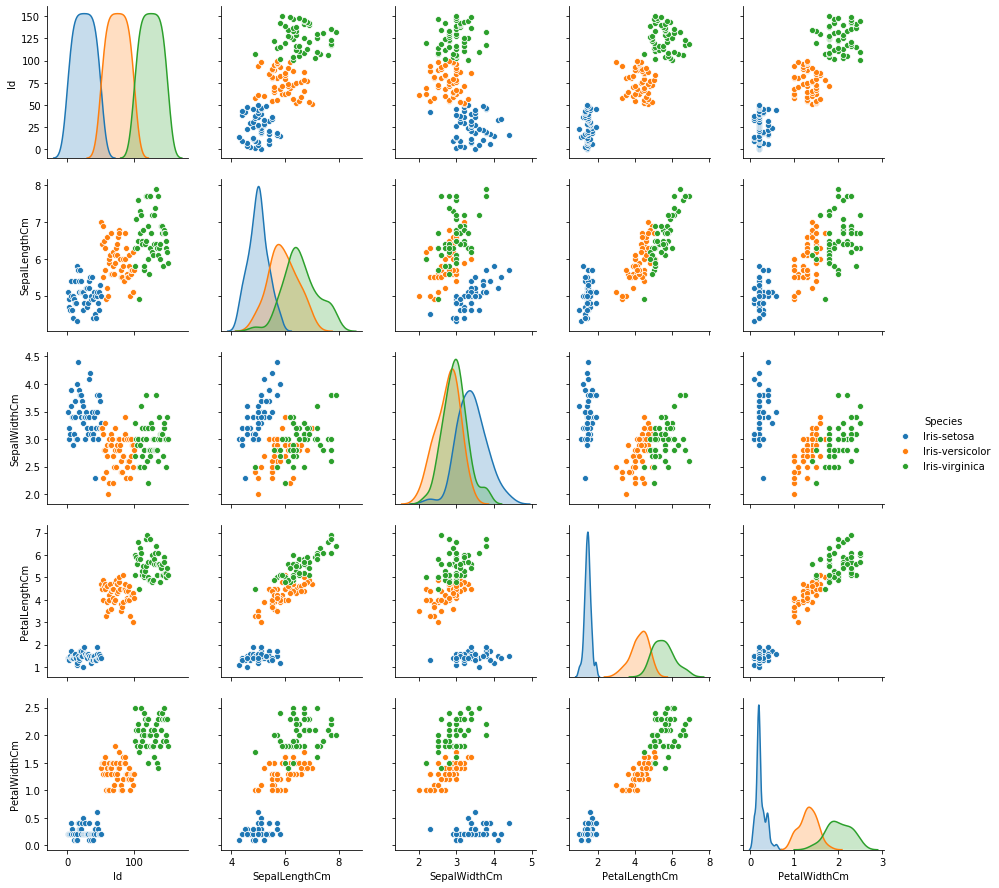

In [5]:
import seaborn as sns
sns.pairplot(data,hue='Species')

> **We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter. while the other two pieces are overlapping a bit on each other.**

> **we can determine the optimum number of cluster using elbow method**

In [6]:
p = data.iloc[:,[0,1,2,3,4]].values

### optimum number of clusters for k-means classification

In [7]:
from sklearn.cluster import KMeans

In [8]:
w = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init=10,random_state=0)
    kmeans.fit(p)
    w.append(kmeans.inertia_)

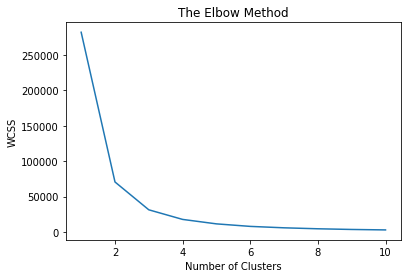

In [9]:
plt.plot(range(1,11),w)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

> we can clearly see why it is called "the elbow mehtod" from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
**In the above graph, it isthere is no bend after 3. Hence take number of clusters is 3**

## Applying k-means to the dataset

In [10]:
#Applying k-means to the dataset
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(p)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Visualising the clusters - On the first two columns and plotting the centroids of the clusters

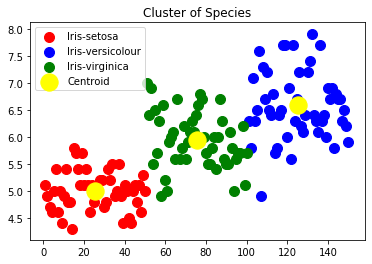

In [11]:
plt.scatter(p[y_kmeans==0,0], p[y_kmeans==0,1],s = 100,c = 'red', label = 'Iris-setosa')
plt.scatter(p[y_kmeans==1,0], p[y_kmeans==1,1],s = 100,c = 'blue', label = 'Iris-versicolour')
plt.scatter(p[y_kmeans==2,0], p[y_kmeans==2,1],s = 100,c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()

In [12]:
KModel = kmeans.fit(p)
KModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [13]:
KModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
KModel.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])